In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data
import torchvision
from torch.utils.tensorboard import SummaryWriter
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import imageio
from scipy.io import FortranFile

# torch.set_default_tensor_type('torch.cuda.FloatTensor')
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Writer will output to ./runs/ directory by default

In [2]:
f = FortranFile('C:/Users/Lawrence Huang/Desktop/Research/z3taured.dat', 'r')
nlos=int(np.asscalar(f.read_ints()))
print("nlos = %d" %nlos)
npix=int(np.asscalar(f.read_ints()))
zred=np.asscalar(f.read_record('f4'))
blenkms=np.asscalar(f.read_record('f4'))
blen=np.asscalar(f.read_record('f4'))*0.001  #back into mpc/h
print(nlos,npix,zred,blenkms,blen)
taured=[]
nstep=128 #skipping through in steps of 64
for i in range(0,nlos,nstep):       
    tauredin=f.read_record('f4')
    taured.extend(tauredin)
f.close()
print('len(taured)=',len(taured))

nlos=int(nlos/nstep)

print ('nlos,npix=',nlos,npix)

taured=np.array(taured)

taured=np.reshape(taured,(nlos,npix))

print('shape of taured=',taured.shape)

print(taured[0,0],taured[0,1])


nlos = 65536
65536 512 3.0 42807.71484375 400.0
len(taured)= 262144
nlos,npix= 512 512
shape of taured= (512, 512)
13.272697 13.76669


15.892097


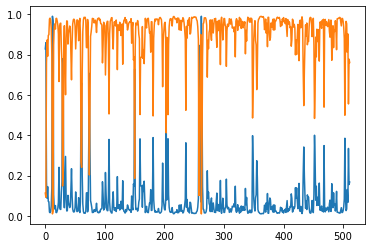

In [3]:
mintaured=taured.min()
maxtaured=taured.max()
taured[taured > 0.5e9] = -1.e10

maxtaured=taured.max()
print (maxtaured)
# set to realistic max:

taured[taured < -0.5e9] = maxtaured
taured=(((taured-mintaured)/(maxtaured-mintaured))*0.98)+0.01
flux=np.exp(-1.*taured)
rmsnoise=0.0 #this is the rms noise to add - if it's zero then we are try 
noise = np.random.normal(0.0,rmsnoise,(nlos,npix))
# 1 is the mean of the normal distribution you are choosing from
# 2 is the standard deviation of the normal distribution
# 3 is the number of elements you get in array noise
flux=flux+noise
minflux=flux.min()
maxflux=flux.max()
flux=(((flux-minflux)/(maxflux-minflux))*0.98)+0.01
taured = torch.from_numpy(taured)
flux = torch.from_numpy(flux)
tauredzero=taured[0,...]

fluxzero=flux[0,...]

#orange is the flux and blue is the optical depth, both scaled to 0.01-0.99
plt.plot(tauredzero.numpy())
plt.plot(fluxzero.numpy())

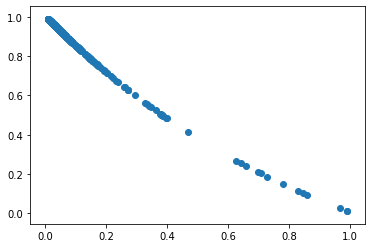

In [4]:
plt.scatter(tauredzero,fluxzero)

In [5]:
a = torch.linspace(0,1,100)
b = torch.tensor([0,10,20,30,40,50,60,70,80,90])

In [6]:
tauredTest = taured[480:,...]
fluxTest = flux[480:,...]
tauredTrain = taured[:480,...]
fluxTrain = flux[:480,...]
print(tauredTest.shape)
print(fluxTest.shape)
print(tauredTrain.shape)
print(fluxTrain.shape)

torch.Size([32, 512])
torch.Size([32, 512])
torch.Size([480, 512])
torch.Size([480, 512])


SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0137]], grad_fn=<SelectBackward>)


C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:431: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch =  0
Training Loss =  tensor(0.0331, grad_fn=<MseLossBackward>)
Test Loss =  0.04653154569132312
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0135]], grad_fn=<SelectBackward>)
Epoch =  1
Training Loss =  tensor(0.0067, grad_fn=<MseLossBackward>)
Test Loss =  0.04648716622250504
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0133]], grad_fn=<SelectBackward>)
Epoch =  2
Training Loss =  tensor(0.0222, grad_fn=<MseLossBackward>)
Test Loss =  0.04644236811691371
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0131]], grad_fn=<SelectBackward>)
Epoch =  3
Training Loss =  tensor(0.0066, grad_fn=<MseLossBackward>)
Test Loss =  0.04639816171948041
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0129]], grad_fn=<SelectBackward>)
Epoch =  4
Train

Training Loss =  tensor(0.0115, grad_fn=<MseLossBackward>)
Test Loss =  0.045956611922520096
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  34
Training Loss =  tensor(0.0052, grad_fn=<MseLossBackward>)
Test Loss =  0.04595544592120859
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  35
Training Loss =  tensor(0.0273, grad_fn=<MseLossBackward>)
Test Loss =  0.045954258010169724
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  36
Training Loss =  tensor(0.0065, grad_fn=<MseLossBackward>)
Test Loss =  0.04595308378520713
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  37
Training L

Training Loss =  tensor(0.0071, grad_fn=<MseLossBackward>)
Test Loss =  0.04594468867799151
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  67
Training Loss =  tensor(0.0321, grad_fn=<MseLossBackward>)
Test Loss =  0.045944657666041167
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  68
Training Loss =  tensor(0.0042, grad_fn=<MseLossBackward>)
Test Loss =  0.045944626623168006
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  69
Training Loss =  tensor(0.0085, grad_fn=<MseLossBackward>)
Test Loss =  0.045944595949549694
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  70
Training 

Training Loss =  tensor(0.0197, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446683586284
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  100
Training Loss =  tensor(0.0287, grad_fn=<MseLossBackward>)
Test Loss =  0.045944466672153794
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  101
Training Loss =  tensor(0.0092, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446652481565
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  102
Training Loss =  tensor(0.0296, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446643386618
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  103
Trainin

Training Loss =  tensor(0.0146, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  133
Training Loss =  tensor(0.0353, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  134
Training Loss =  tensor(0.0069, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  135
Training Loss =  tensor(0.0068, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  136
Training

Training Loss =  tensor(0.0353, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  166
Training Loss =  tensor(0.0306, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  167
Training Loss =  tensor(0.0108, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  168
Training Loss =  tensor(0.0103, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  169
Training

Training Loss =  tensor(0.0264, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  199
Training Loss =  tensor(0.0317, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  200
Training Loss =  tensor(0.0080, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  201
Training Loss =  tensor(0.0390, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  202
Training

Training Loss =  tensor(0.0204, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  232
Training Loss =  tensor(0.0241, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  233
Training Loss =  tensor(0.0029, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  234
Training Loss =  tensor(0.0051, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  235
Training

Training Loss =  tensor(0.0048, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  265
Training Loss =  tensor(0.0208, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  266
Training Loss =  tensor(0.0079, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  267
Training Loss =  tensor(0.0297, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  268
Training

Training Loss =  tensor(0.0081, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  298
Training Loss =  tensor(0.0081, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  299
Training Loss =  tensor(0.0256, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  300
Training Loss =  tensor(0.0032, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  301
Training

Training Loss =  tensor(0.0118, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  331
Training Loss =  tensor(0.0294, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  332
Training Loss =  tensor(0.0093, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  333
Training Loss =  tensor(0.0098, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  334
Training

Training Loss =  tensor(0.0074, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  364
Training Loss =  tensor(0.0037, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  365
Training Loss =  tensor(0.0125, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  366
Training Loss =  tensor(0.0118, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  367
Training

Training Loss =  tensor(0.0337, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  397
Training Loss =  tensor(0.0117, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  398
Training Loss =  tensor(0.0191, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  399
Training Loss =  tensor(0.0140, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  400
Training

Training Loss =  tensor(0.0084, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  430
Training Loss =  tensor(0.0105, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  431
Training Loss =  tensor(0.0249, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  432
Training Loss =  tensor(0.0325, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  433
Training

Training Loss =  tensor(0.0449, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  463
Training Loss =  tensor(0.0086, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  464
Training Loss =  tensor(0.0066, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  465
Training Loss =  tensor(0.0068, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  466
Training

Training Loss =  tensor(0.0045, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  496
Training Loss =  tensor(0.0101, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  497
Training Loss =  tensor(0.0126, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  498
Training Loss =  tensor(0.0166, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  499
Training

Training Loss =  tensor(0.0083, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  529
Training Loss =  tensor(0.0066, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  530
Training Loss =  tensor(0.0063, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  531
Training Loss =  tensor(0.0508, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  532
Training

Training Loss =  tensor(0.0062, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  562
Training Loss =  tensor(0.0124, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  563
Training Loss =  tensor(0.0103, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  564
Training Loss =  tensor(0.0061, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  565
Training

Training Loss =  tensor(0.0390, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  595
Training Loss =  tensor(0.0223, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  596
Training Loss =  tensor(0.0192, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  597
Training Loss =  tensor(0.0267, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  598
Training

Training Loss =  tensor(0.0321, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  628
Training Loss =  tensor(0.0065, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  629
Training Loss =  tensor(0.0081, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  630
Training Loss =  tensor(0.0085, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  631
Training

Training Loss =  tensor(0.0252, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  661
Training Loss =  tensor(0.0282, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  662
Training Loss =  tensor(0.0084, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  663
Training Loss =  tensor(0.0130, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  664
Training

Training Loss =  tensor(0.0141, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  694
Training Loss =  tensor(0.0054, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  695
Training Loss =  tensor(0.0289, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  696
Training Loss =  tensor(0.0099, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  697
Training

Training Loss =  tensor(0.0074, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  727
Training Loss =  tensor(0.0069, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  728
Training Loss =  tensor(0.0142, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  729
Training Loss =  tensor(0.0331, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  730
Training

Training Loss =  tensor(0.0073, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  760
Training Loss =  tensor(0.0342, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  761
Training Loss =  tensor(0.0064, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  762
Training Loss =  tensor(0.0082, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  763
Training

Training Loss =  tensor(0.0375, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  793
Training Loss =  tensor(0.0368, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  794
Training Loss =  tensor(0.0039, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  795
Training Loss =  tensor(0.0247, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  796
Training

Training Loss =  tensor(0.0078, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  826
Training Loss =  tensor(0.0051, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  827
Training Loss =  tensor(0.0118, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  828
Training Loss =  tensor(0.0412, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  829
Training

Training Loss =  tensor(0.0049, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  859
Training Loss =  tensor(0.0237, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  860
Training Loss =  tensor(0.0074, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  861
Training Loss =  tensor(0.0088, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  862
Training

Training Loss =  tensor(0.0109, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  892
Training Loss =  tensor(0.0130, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  893
Training Loss =  tensor(0.0258, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  894
Training Loss =  tensor(0.0462, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  895
Training

Training Loss =  tensor(0.0106, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  925
Training Loss =  tensor(0.0092, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  926
Training Loss =  tensor(0.0107, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  927
Training Loss =  tensor(0.0061, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  928
Training

Training Loss =  tensor(0.0124, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  958
Training Loss =  tensor(0.0063, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  959
Training Loss =  tensor(0.0388, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  960
Training Loss =  tensor(0.0038, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  961
Training

Training Loss =  tensor(0.0064, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  991
Training Loss =  tensor(0.0122, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  992
Training Loss =  tensor(0.0065, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  993
Training Loss =  tensor(0.0063, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  994
Training

They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1023
Training Loss =  tensor(0.0246, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1024
Training Loss =  tensor(0.0055, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1025
Training Loss =  tensor(0.0056, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1026
Training Loss =  tensor(0.0082, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They

Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1056
Training Loss =  tensor(0.0063, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1057
Training Loss =  tensor(0.0309, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1058
Training Loss =  tensor(0.0161, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1059
Training Loss =  tensor(0.0078, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Pred

SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1089
Training Loss =  tensor(0.0143, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1090
Training Loss =  tensor(0.0075, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1091
Training Loss =  tensor(0.0136, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1092
Training Loss =  tensor(0.0153, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAP

Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1122
Training Loss =  tensor(0.0045, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1123
Training Loss =  tensor(0.0055, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1124
Training Loss =  tensor(0.0265, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1125
Training Loss =  tensor(0.0067, grad_fn=<MseLossBackward>)
Test

Training Loss =  tensor(0.0104, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1155
Training Loss =  tensor(0.0066, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1156
Training Loss =  tensor(0.0191, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1157
Training Loss =  tensor(0.0077, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1158
Trai

They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1187
Training Loss =  tensor(0.0188, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1188
Training Loss =  tensor(0.0067, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1189
Training Loss =  tensor(0.0032, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1190
Training Loss =  tensor(0.0099, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They

Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1220
Training Loss =  tensor(0.0036, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1221
Training Loss =  tensor(0.0057, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1222
Training Loss =  tensor(0.0135, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1223
Training Loss =  tensor(0.0304, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Pred

SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1253
Training Loss =  tensor(0.0084, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1254
Training Loss =  tensor(0.0102, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1255
Training Loss =  tensor(0.0242, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1256
Training Loss =  tensor(0.0064, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAP

Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1286
Training Loss =  tensor(0.0089, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1287
Training Loss =  tensor(0.0056, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1288
Training Loss =  tensor(0.0268, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1289
Training Loss =  tensor(0.0198, grad_fn=<MseLossBackward>)
Test

Training Loss =  tensor(0.0035, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1319
Training Loss =  tensor(0.0166, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1320
Training Loss =  tensor(0.0254, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1321
Training Loss =  tensor(0.0073, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1322
Trai

They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1351
Training Loss =  tensor(0.0040, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1352
Training Loss =  tensor(0.0168, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1353
Training Loss =  tensor(0.0178, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1354
Training Loss =  tensor(0.0290, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They

Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1384
Training Loss =  tensor(0.0235, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1385
Training Loss =  tensor(0.0043, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1386
Training Loss =  tensor(0.0057, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1387
Training Loss =  tensor(0.0084, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Pred

SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1417
Training Loss =  tensor(0.0284, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1418
Training Loss =  tensor(0.0282, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1419
Training Loss =  tensor(0.0072, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1420
Training Loss =  tensor(0.0126, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAP

Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1450
Training Loss =  tensor(0.0057, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1451
Training Loss =  tensor(0.0039, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1452
Training Loss =  tensor(0.0193, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1453
Training Loss =  tensor(0.0222, grad_fn=<MseLossBackward>)
Test

Training Loss =  tensor(0.0333, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1483
Training Loss =  tensor(0.0092, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1484
Training Loss =  tensor(0.0353, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1485
Training Loss =  tensor(0.0028, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1486
Trai

They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1515
Training Loss =  tensor(0.0069, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1516
Training Loss =  tensor(0.0084, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1517
Training Loss =  tensor(0.0042, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1518
Training Loss =  tensor(0.0116, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They

Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1548
Training Loss =  tensor(0.0033, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1549
Training Loss =  tensor(0.0052, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1550
Training Loss =  tensor(0.0061, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1551
Training Loss =  tensor(0.0079, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Pred

SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1581
Training Loss =  tensor(0.0077, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1582
Training Loss =  tensor(0.0084, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1583
Training Loss =  tensor(0.0107, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1584
Training Loss =  tensor(0.0081, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAP

Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1614
Training Loss =  tensor(0.0099, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1615
Training Loss =  tensor(0.0192, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1616
Training Loss =  tensor(0.0314, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1617
Training Loss =  tensor(0.0103, grad_fn=<MseLossBackward>)
Test

Training Loss =  tensor(0.0082, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1647
Training Loss =  tensor(0.0135, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1648
Training Loss =  tensor(0.0232, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1649
Training Loss =  tensor(0.0039, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1650
Trai

They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1679
Training Loss =  tensor(0.0138, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1680
Training Loss =  tensor(0.0045, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1681
Training Loss =  tensor(0.0139, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1682
Training Loss =  tensor(0.0070, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They

Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1712
Training Loss =  tensor(0.0209, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1713
Training Loss =  tensor(0.0045, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1714
Training Loss =  tensor(0.0084, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1715
Training Loss =  tensor(0.0256, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Pred

SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1745
Training Loss =  tensor(0.0091, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1746
Training Loss =  tensor(0.0436, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1747
Training Loss =  tensor(0.0059, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1748
Training Loss =  tensor(0.0056, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAP

Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1778
Training Loss =  tensor(0.0401, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1779
Training Loss =  tensor(0.0053, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1780
Training Loss =  tensor(0.0195, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1781
Training Loss =  tensor(0.0068, grad_fn=<MseLossBackward>)
Test

Training Loss =  tensor(0.0167, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1811
Training Loss =  tensor(0.0171, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1812
Training Loss =  tensor(0.0104, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1813
Training Loss =  tensor(0.0103, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1814
Trai

They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1843
Training Loss =  tensor(0.0092, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1844
Training Loss =  tensor(0.0097, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1845
Training Loss =  tensor(0.0085, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1846
Training Loss =  tensor(0.0111, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They

Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1876
Training Loss =  tensor(0.0026, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1877
Training Loss =  tensor(0.0043, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1878
Training Loss =  tensor(0.0091, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1879
Training Loss =  tensor(0.0056, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Pred

SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1909
Training Loss =  tensor(0.0127, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1910
Training Loss =  tensor(0.0079, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1911
Training Loss =  tensor(0.0218, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1912
Training Loss =  tensor(0.0076, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAP

Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1942
Training Loss =  tensor(0.0107, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1943
Training Loss =  tensor(0.0173, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1944
Training Loss =  tensor(0.0197, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1945
Training Loss =  tensor(0.0165, grad_fn=<MseLossBackward>)
Test

Training Loss =  tensor(0.0083, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1975
Training Loss =  tensor(0.0115, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1976
Training Loss =  tensor(0.0073, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1977
Training Loss =  tensor(0.0075, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  1978
Trai

They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2007
Training Loss =  tensor(0.0084, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2008
Training Loss =  tensor(0.0133, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2009
Training Loss =  tensor(0.0142, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2010
Training Loss =  tensor(0.0186, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They

Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2040
Training Loss =  tensor(0.0090, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2041
Training Loss =  tensor(0.0077, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2042
Training Loss =  tensor(0.0099, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2043
Training Loss =  tensor(0.0395, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Pred

SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2073
Training Loss =  tensor(0.0051, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2074
Training Loss =  tensor(0.0227, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2075
Training Loss =  tensor(0.0094, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2076
Training Loss =  tensor(0.0131, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAP

Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2106
Training Loss =  tensor(0.0113, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2107
Training Loss =  tensor(0.0068, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2108
Training Loss =  tensor(0.0106, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2109
Training Loss =  tensor(0.0122, grad_fn=<MseLossBackward>)
Test

Training Loss =  tensor(0.0196, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2139
Training Loss =  tensor(0.0234, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2140
Training Loss =  tensor(0.0149, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2141
Training Loss =  tensor(0.0136, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2142
Trai

They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2171
Training Loss =  tensor(0.0327, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2172
Training Loss =  tensor(0.0037, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2173
Training Loss =  tensor(0.0096, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2174
Training Loss =  tensor(0.0232, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They

Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2204
Training Loss =  tensor(0.0030, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2205
Training Loss =  tensor(0.0154, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2206
Training Loss =  tensor(0.0279, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2207
Training Loss =  tensor(0.0063, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Pred

SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2237
Training Loss =  tensor(0.0253, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2238
Training Loss =  tensor(0.0105, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2239
Training Loss =  tensor(0.0068, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2240
Training Loss =  tensor(0.0073, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAP

Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2270
Training Loss =  tensor(0.0261, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2271
Training Loss =  tensor(0.0119, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2272
Training Loss =  tensor(0.0526, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2273
Training Loss =  tensor(0.0334, grad_fn=<MseLossBackward>)
Test

Training Loss =  tensor(0.0068, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2303
Training Loss =  tensor(0.0237, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2304
Training Loss =  tensor(0.0116, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2305
Training Loss =  tensor(0.0089, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2306
Trai

They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2335
Training Loss =  tensor(0.0094, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2336
Training Loss =  tensor(0.0064, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2337
Training Loss =  tensor(0.0133, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2338
Training Loss =  tensor(0.0210, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They

Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2368
Training Loss =  tensor(0.0106, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2369
Training Loss =  tensor(0.0153, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2370
Training Loss =  tensor(0.0153, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2371
Training Loss =  tensor(0.0213, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Pred

SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2401
Training Loss =  tensor(0.0181, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2402
Training Loss =  tensor(0.0067, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2403
Training Loss =  tensor(0.0042, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2404
Training Loss =  tensor(0.0177, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAP

Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2434
Training Loss =  tensor(0.0104, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2435
Training Loss =  tensor(0.0360, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2436
Training Loss =  tensor(0.0051, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2437
Training Loss =  tensor(0.0167, grad_fn=<MseLossBackward>)
Test

Training Loss =  tensor(0.0361, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2467
Training Loss =  tensor(0.0063, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2468
Training Loss =  tensor(0.0053, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2469
Training Loss =  tensor(0.0098, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2470
Trai

They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2499
Training Loss =  tensor(0.0305, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2500
Training Loss =  tensor(0.0132, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2501
Training Loss =  tensor(0.0125, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2502
Training Loss =  tensor(0.0092, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They

Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2532
Training Loss =  tensor(0.0141, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2533
Training Loss =  tensor(0.0089, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2534
Training Loss =  tensor(0.0056, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2535
Training Loss =  tensor(0.0069, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Pred

SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2565
Training Loss =  tensor(0.0044, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2566
Training Loss =  tensor(0.0191, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2567
Training Loss =  tensor(0.0055, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2568
Training Loss =  tensor(0.0088, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAP

Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2598
Training Loss =  tensor(0.0057, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2599
Training Loss =  tensor(0.0195, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2600
Training Loss =  tensor(0.0114, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2601
Training Loss =  tensor(0.0057, grad_fn=<MseLossBackward>)
Test

Training Loss =  tensor(0.0079, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2631
Training Loss =  tensor(0.0063, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2632
Training Loss =  tensor(0.0103, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2633
Training Loss =  tensor(0.0305, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2634
Trai

They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2663
Training Loss =  tensor(0.0104, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2664
Training Loss =  tensor(0.0039, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2665
Training Loss =  tensor(0.0072, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2666
Training Loss =  tensor(0.0266, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They

Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2696
Training Loss =  tensor(0.0280, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2697
Training Loss =  tensor(0.0088, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2698
Training Loss =  tensor(0.0296, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2699
Training Loss =  tensor(0.0060, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Pred

SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2729
Training Loss =  tensor(0.0149, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2730
Training Loss =  tensor(0.0036, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2731
Training Loss =  tensor(0.0123, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2732
Training Loss =  tensor(0.0040, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAP

Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2762
Training Loss =  tensor(0.0088, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2763
Training Loss =  tensor(0.0054, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2764
Training Loss =  tensor(0.0083, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2765
Training Loss =  tensor(0.0080, grad_fn=<MseLossBackward>)
Test

Training Loss =  tensor(0.0073, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2795
Training Loss =  tensor(0.0134, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2796
Training Loss =  tensor(0.0163, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2797
Training Loss =  tensor(0.0060, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2798
Trai

They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2827
Training Loss =  tensor(0.0115, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2828
Training Loss =  tensor(0.0209, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2829
Training Loss =  tensor(0.0053, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2830
Training Loss =  tensor(0.0120, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They

Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2860
Training Loss =  tensor(0.0121, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2861
Training Loss =  tensor(0.0160, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2862
Training Loss =  tensor(0.0061, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2863
Training Loss =  tensor(0.0327, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Pred

SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2893
Training Loss =  tensor(0.0260, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2894
Training Loss =  tensor(0.0230, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2895
Training Loss =  tensor(0.0069, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2896
Training Loss =  tensor(0.0331, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAP

Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2926
Training Loss =  tensor(0.0073, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2927
Training Loss =  tensor(0.0094, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2928
Training Loss =  tensor(0.0074, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2929
Training Loss =  tensor(0.0032, grad_fn=<MseLossBackward>)
Test

Training Loss =  tensor(0.0455, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2959
Training Loss =  tensor(0.0219, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2960
Training Loss =  tensor(0.0083, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2961
Training Loss =  tensor(0.0068, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2962
Trai

They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2991
Training Loss =  tensor(0.0265, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2992
Training Loss =  tensor(0.0090, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2993
Training Loss =  tensor(0.0157, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  2994
Training Loss =  tensor(0.0050, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They

Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3024
Training Loss =  tensor(0.0242, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3025
Training Loss =  tensor(0.0120, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3026
Training Loss =  tensor(0.0178, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3027
Training Loss =  tensor(0.0108, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Pred

SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3057
Training Loss =  tensor(0.0069, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3058
Training Loss =  tensor(0.0140, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3059
Training Loss =  tensor(0.0195, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3060
Training Loss =  tensor(0.0379, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAP

Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3090
Training Loss =  tensor(0.0085, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3091
Training Loss =  tensor(0.0031, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3092
Training Loss =  tensor(0.0317, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3093
Training Loss =  tensor(0.0145, grad_fn=<MseLossBackward>)
Test

Training Loss =  tensor(0.0191, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3123
Training Loss =  tensor(0.0097, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3124
Training Loss =  tensor(0.0196, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3125
Training Loss =  tensor(0.0157, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3126
Trai

They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3155
Training Loss =  tensor(0.0038, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3156
Training Loss =  tensor(0.0101, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3157
Training Loss =  tensor(0.0076, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3158
Training Loss =  tensor(0.0097, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They

Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3188
Training Loss =  tensor(0.0222, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3189
Training Loss =  tensor(0.0112, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3190
Training Loss =  tensor(0.0096, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3191
Training Loss =  tensor(0.0056, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Pred

SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3221
Training Loss =  tensor(0.0074, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3222
Training Loss =  tensor(0.0209, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3223
Training Loss =  tensor(0.0086, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3224
Training Loss =  tensor(0.0281, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAP

Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3254
Training Loss =  tensor(0.0047, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3255
Training Loss =  tensor(0.0089, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3256
Training Loss =  tensor(0.0192, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3257
Training Loss =  tensor(0.0060, grad_fn=<MseLossBackward>)
Test

Training Loss =  tensor(0.0209, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3287
Training Loss =  tensor(0.0186, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3288
Training Loss =  tensor(0.0052, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3289
Training Loss =  tensor(0.0059, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3290
Trai

They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3319
Training Loss =  tensor(0.0138, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3320
Training Loss =  tensor(0.0052, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3321
Training Loss =  tensor(0.0130, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3322
Training Loss =  tensor(0.0071, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They

Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3352
Training Loss =  tensor(0.0117, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3353
Training Loss =  tensor(0.0235, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3354
Training Loss =  tensor(0.0089, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3355
Training Loss =  tensor(0.0064, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Pred

SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3385
Training Loss =  tensor(0.0123, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3386
Training Loss =  tensor(0.0228, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3387
Training Loss =  tensor(0.0256, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3388
Training Loss =  tensor(0.0126, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAP

Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3418
Training Loss =  tensor(0.0084, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3419
Training Loss =  tensor(0.0046, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3420
Training Loss =  tensor(0.0137, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3421
Training Loss =  tensor(0.0054, grad_fn=<MseLossBackward>)
Test

Training Loss =  tensor(0.0054, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3451
Training Loss =  tensor(0.0349, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3452
Training Loss =  tensor(0.0208, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3453
Training Loss =  tensor(0.0157, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3454
Trai

They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3483
Training Loss =  tensor(0.0064, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3484
Training Loss =  tensor(0.0087, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3485
Training Loss =  tensor(0.0163, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3486
Training Loss =  tensor(0.0150, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They

Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3516
Training Loss =  tensor(0.0066, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3517
Training Loss =  tensor(0.0104, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3518
Training Loss =  tensor(0.0090, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3519
Training Loss =  tensor(0.0182, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Pred

SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3549
Training Loss =  tensor(0.0090, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3550
Training Loss =  tensor(0.0102, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3551
Training Loss =  tensor(0.0245, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3552
Training Loss =  tensor(0.0182, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAP

Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3582
Training Loss =  tensor(0.0252, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3583
Training Loss =  tensor(0.0104, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3584
Training Loss =  tensor(0.0412, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3585
Training Loss =  tensor(0.0153, grad_fn=<MseLossBackward>)
Test

Training Loss =  tensor(0.0171, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3615
Training Loss =  tensor(0.0114, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3616
Training Loss =  tensor(0.0316, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3617
Training Loss =  tensor(0.0084, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3618
Trai

They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3647
Training Loss =  tensor(0.0078, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3648
Training Loss =  tensor(0.0267, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3649
Training Loss =  tensor(0.0463, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3650
Training Loss =  tensor(0.0043, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They

Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3680
Training Loss =  tensor(0.0272, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3681
Training Loss =  tensor(0.0079, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3682
Training Loss =  tensor(0.0090, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3683
Training Loss =  tensor(0.0058, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Pred

SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3713
Training Loss =  tensor(0.0151, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3714
Training Loss =  tensor(0.0093, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3715
Training Loss =  tensor(0.0217, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3716
Training Loss =  tensor(0.0337, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAP

Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3746
Training Loss =  tensor(0.0136, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3747
Training Loss =  tensor(0.0063, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3748
Training Loss =  tensor(0.0268, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3749
Training Loss =  tensor(0.0120, grad_fn=<MseLossBackward>)
Test

Training Loss =  tensor(0.0033, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3779
Training Loss =  tensor(0.0053, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3780
Training Loss =  tensor(0.0161, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3781
Training Loss =  tensor(0.0105, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3782
Trai

They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3811
Training Loss =  tensor(0.0068, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3812
Training Loss =  tensor(0.0241, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3813
Training Loss =  tensor(0.0088, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3814
Training Loss =  tensor(0.0247, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They

Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3844
Training Loss =  tensor(0.0043, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3845
Training Loss =  tensor(0.0045, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3846
Training Loss =  tensor(0.0070, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3847
Training Loss =  tensor(0.0080, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Pred

SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3877
Training Loss =  tensor(0.0091, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3878
Training Loss =  tensor(0.0145, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3879
Training Loss =  tensor(0.0093, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3880
Training Loss =  tensor(0.0084, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAP

Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3910
Training Loss =  tensor(0.0106, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3911
Training Loss =  tensor(0.0059, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3912
Training Loss =  tensor(0.0376, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3913
Training Loss =  tensor(0.0056, grad_fn=<MseLossBackward>)
Test

Training Loss =  tensor(0.0227, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3943
Training Loss =  tensor(0.0078, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3944
Training Loss =  tensor(0.0054, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3945
Training Loss =  tensor(0.0174, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3946
Trai

They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3975
Training Loss =  tensor(0.0052, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3976
Training Loss =  tensor(0.0036, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3977
Training Loss =  tensor(0.0067, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  3978
Training Loss =  tensor(0.0043, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They

Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4008
Training Loss =  tensor(0.0077, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4009
Training Loss =  tensor(0.0056, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4010
Training Loss =  tensor(0.0369, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4011
Training Loss =  tensor(0.0226, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Pred

SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4041
Training Loss =  tensor(0.0047, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4042
Training Loss =  tensor(0.0054, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4043
Training Loss =  tensor(0.0100, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4044
Training Loss =  tensor(0.0267, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAP

Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4074
Training Loss =  tensor(0.0067, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4075
Training Loss =  tensor(0.0092, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4076
Training Loss =  tensor(0.0082, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4077
Training Loss =  tensor(0.0045, grad_fn=<MseLossBackward>)
Test

Training Loss =  tensor(0.0055, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4107
Training Loss =  tensor(0.0054, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4108
Training Loss =  tensor(0.0208, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4109
Training Loss =  tensor(0.0126, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4110
Trai

They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4139
Training Loss =  tensor(0.0058, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4140
Training Loss =  tensor(0.0063, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4141
Training Loss =  tensor(0.0065, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4142
Training Loss =  tensor(0.0293, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They

Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4172
Training Loss =  tensor(0.0109, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4173
Training Loss =  tensor(0.0187, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4174
Training Loss =  tensor(0.0074, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4175
Training Loss =  tensor(0.0255, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Pred

SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4205
Training Loss =  tensor(0.0085, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4206
Training Loss =  tensor(0.0169, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4207
Training Loss =  tensor(0.0064, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4208
Training Loss =  tensor(0.0086, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAP

Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4238
Training Loss =  tensor(0.0104, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4239
Training Loss =  tensor(0.0192, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4240
Training Loss =  tensor(0.0114, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4241
Training Loss =  tensor(0.0058, grad_fn=<MseLossBackward>)
Test

Training Loss =  tensor(0.0044, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4271
Training Loss =  tensor(0.0259, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4272
Training Loss =  tensor(0.0090, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4273
Training Loss =  tensor(0.0230, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4274
Trai

They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4303
Training Loss =  tensor(0.0101, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4304
Training Loss =  tensor(0.0098, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4305
Training Loss =  tensor(0.0248, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4306
Training Loss =  tensor(0.0296, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They

Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4336
Training Loss =  tensor(0.0227, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4337
Training Loss =  tensor(0.0158, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4338
Training Loss =  tensor(0.0297, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4339
Training Loss =  tensor(0.0085, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Pred

SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4369
Training Loss =  tensor(0.0062, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4370
Training Loss =  tensor(0.0217, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4371
Training Loss =  tensor(0.0075, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4372
Training Loss =  tensor(0.0226, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAP

Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4402
Training Loss =  tensor(0.0054, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4403
Training Loss =  tensor(0.0127, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4404
Training Loss =  tensor(0.0031, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4405
Training Loss =  tensor(0.0132, grad_fn=<MseLossBackward>)
Test

Training Loss =  tensor(0.0090, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4435
Training Loss =  tensor(0.0300, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4436
Training Loss =  tensor(0.0092, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4437
Training Loss =  tensor(0.0264, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4438
Trai

They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4467
Training Loss =  tensor(0.0068, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4468
Training Loss =  tensor(0.0248, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4469
Training Loss =  tensor(0.0166, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4470
Training Loss =  tensor(0.0570, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They

Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4500
Training Loss =  tensor(0.0084, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4501
Training Loss =  tensor(0.0082, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4502
Training Loss =  tensor(0.0085, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4503
Training Loss =  tensor(0.0119, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Pred

SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4533
Training Loss =  tensor(0.0231, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4534
Training Loss =  tensor(0.0127, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4535
Training Loss =  tensor(0.0440, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4536
Training Loss =  tensor(0.0057, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAP

Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4566
Training Loss =  tensor(0.0116, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4567
Training Loss =  tensor(0.0100, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4568
Training Loss =  tensor(0.0136, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4569
Training Loss =  tensor(0.0067, grad_fn=<MseLossBackward>)
Test

Training Loss =  tensor(0.0060, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4599
Training Loss =  tensor(0.0052, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4600
Training Loss =  tensor(0.0045, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4601
Training Loss =  tensor(0.0123, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4602
Trai

They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4631
Training Loss =  tensor(0.0082, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4632
Training Loss =  tensor(0.0051, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4633
Training Loss =  tensor(0.0055, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4634
Training Loss =  tensor(0.0221, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They

Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4664
Training Loss =  tensor(0.0065, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4665
Training Loss =  tensor(0.0127, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4666
Training Loss =  tensor(0.0089, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4667
Training Loss =  tensor(0.0045, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Pred

SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4697
Training Loss =  tensor(0.0123, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4698
Training Loss =  tensor(0.0190, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4699
Training Loss =  tensor(0.0057, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4700
Training Loss =  tensor(0.0634, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAP

Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4730
Training Loss =  tensor(0.0268, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4731
Training Loss =  tensor(0.0203, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4732
Training Loss =  tensor(0.0055, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4733
Training Loss =  tensor(0.0069, grad_fn=<MseLossBackward>)
Test

Training Loss =  tensor(0.0076, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4763
Training Loss =  tensor(0.0229, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4764
Training Loss =  tensor(0.0145, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4765
Training Loss =  tensor(0.0090, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4766
Trai

They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4795
Training Loss =  tensor(0.0050, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4796
Training Loss =  tensor(0.0377, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4797
Training Loss =  tensor(0.0216, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4798
Training Loss =  tensor(0.0047, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They

Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4828
Training Loss =  tensor(0.0323, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4829
Training Loss =  tensor(0.0080, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4830
Training Loss =  tensor(0.0060, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4831
Training Loss =  tensor(0.0118, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Pred

SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4861
Training Loss =  tensor(0.0071, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4862
Training Loss =  tensor(0.0081, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4863
Training Loss =  tensor(0.0103, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4864
Training Loss =  tensor(0.0042, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAP

Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4894
Training Loss =  tensor(0.0081, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4895
Training Loss =  tensor(0.0069, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4896
Training Loss =  tensor(0.0091, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4897
Training Loss =  tensor(0.0061, grad_fn=<MseLossBackward>)
Test

Training Loss =  tensor(0.0117, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4927
Training Loss =  tensor(0.0027, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4928
Training Loss =  tensor(0.0082, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4929
Training Loss =  tensor(0.0153, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4930
Trai

They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4959
Training Loss =  tensor(0.0218, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4960
Training Loss =  tensor(0.0093, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4961
Training Loss =  tensor(0.0152, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4962
Training Loss =  tensor(0.0062, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They

Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4992
Training Loss =  tensor(0.0039, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4993
Training Loss =  tensor(0.0061, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4994
Training Loss =  tensor(0.0082, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Prediction:  torch.Size([48, 1, 1])
They're all the same
They're all tensor([[-0.0109]], grad_fn=<SelectBackward>)
Epoch =  4995
Training Loss =  tensor(0.0047, grad_fn=<MseLossBackward>)
Test Loss =  0.04594446433293342
SHAPE
torch.Size([48, 512])
Pred

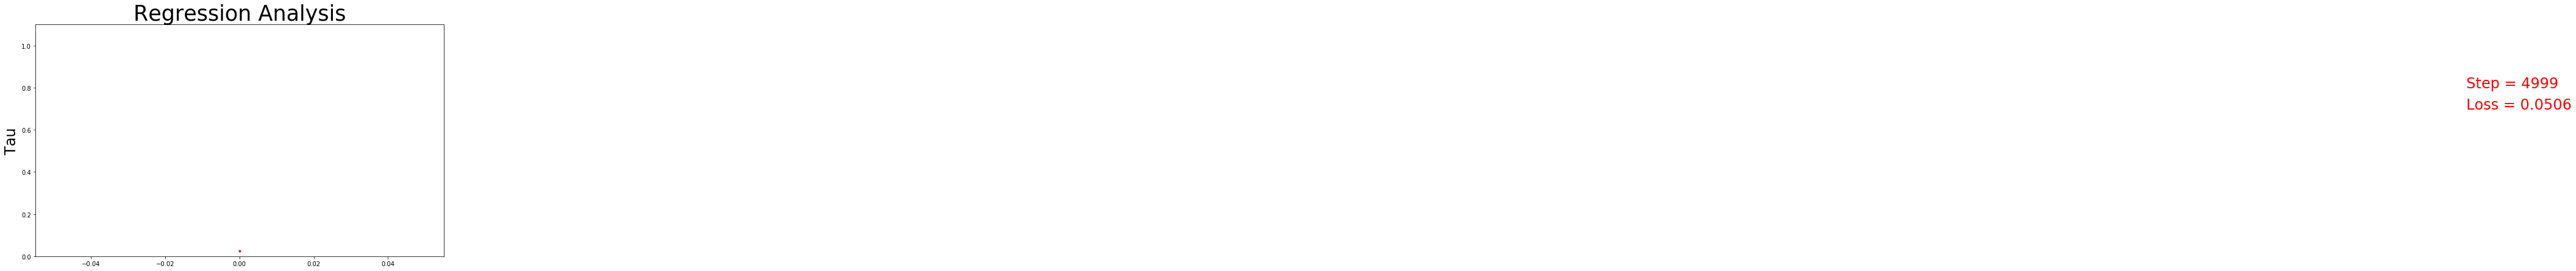

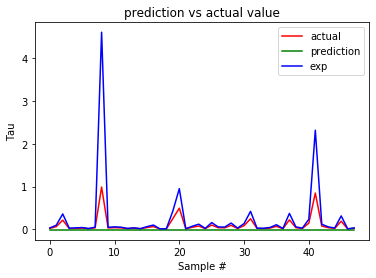

Exponential Regression Loss =  0.22437562
Prediction Loss =  0.07638705


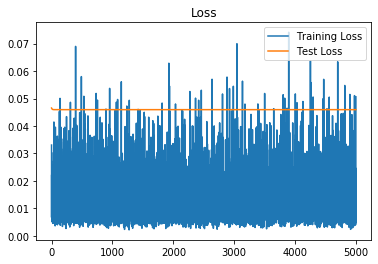

torch.Size([5000])
torch.Size([5000])


In [7]:

writer = SummaryWriter()

def trainSplit(tauredSet, fluxSet, num):
    indices = torch.randint(low=0,high=tauredSet.shape[0],size=(num,))
#     print(indices)
#     print(tauredSet[indices,...])
#     print(fluxSet[indices,...])
    print("SHAPE")
    print(tauredSet[indices,...].shape)
    return tauredSet[indices,256], fluxSet[indices,...]
    

#to test
def validate():
    loss = np.zeros(32)
    net.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for i in range(32):
            y = fluxTest[i,...].float()
            y = torch.reshape(y, (-1,1,512))
            prediction = net(y)
            loss[i] = loss_func(prediction, tauredTest[i,256].float())
        # print('Test Accuracy of the model on the test data: {} %'.format(100 * correct / total))
    net.train()
    return np.mean(loss)



# this is one way to define a network
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden1 = torch.nn.Conv1d(1, 3, 5)   # hidden layer
        self.pool1 = torch.nn.MaxPool1d(5,stride = 1)
        self.hidden2 = torch.nn.Linear(504,1000)
        self.hidden3 = torch.nn.Linear(1000, 2000)
        self.hidden4 = torch.nn.Linear(2000, 2500)
        self.hidden5 = torch.nn.Linear(2500,3200)
        self.hidden6 = torch.nn.Linear(3200,4800)
        self.hidden7 = torch.nn.Conv1d(3,1,11)
        self.predict = torch.nn.Linear(4790, 1)   # output layer

    def forward(self, x):
#         IT IS NOT AN ISSUE WITH PASSING THE INFORMATION IN
#         plt.figure()
#         plt.plot(x.reshape(-1).detach())
#         plt.show()
        x = F.relu(self.hidden1(x))
        x = self.pool1(x)
        x = F.relu(self.hidden2(x))
        x = F.relu(self.hidden3(x))
        x = F.relu(self.hidden4(x))
        x = F.relu(self.hidden5(x))
        x = F.relu(self.hidden6(x))
        x = F.relu(self.hidden7(x))
        x = self.predict(x)
        return x

# net = Net(n_feature=1, n_hidden=10, n_output=1)     # define the network
epochs = 5000
learningRate = 0.0002
net = Net()

writer.add_text("Net", str(net))
writer.add_text("Epochs", str(epochs))
writer.add_text("Learning Rate", str(learningRate))


# print(net)  # net architecture
# optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
optimizer = torch.optim.Adam( net.parameters(), learningRate, weight_decay=0.0005 )
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 10, gamma=0.3)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss
my_images = []
fig, ax = plt.subplots(figsize=(12,7))
totalTrainLoss = torch.zeros(epochs)
totalTestLoss = torch.zeros(epochs)
predictedMean = torch.zeros(epochs)
tauredMean = torch.zeros(epochs)
a = torch.zeros(512)
a = torch.reshape(a, (-1,1,512))
# train the network
for t in range(epochs):
    
    x,y = trainSplit(tauredTrain, fluxTrain, 48)
    x = x.float()
    y = y.float()
#     print(x.shape)
#     print(y.shape)
    x = torch.reshape(x, (-1,1,1))
    y = torch.reshape(y, (-1,1,512))
    prediction = net(y)     # input x and predict based on x
    print("Prediction: ", prediction.shape)
    if torch.equal(prediction[1], prediction[2]) and torch.equal(prediction[2], prediction[37]):
        print("They're all the same")
        print("They're all", prediction[1])
    loss = loss_func(prediction, x)     # must be (1. nn output, 2. target)
    

    
    
    
    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    scheduler.step()        # scheduler decreases learning rate geometrically every n epochs
    

    
    testLoss = validate()
    totalTrainLoss[t] = loss
    totalTestLoss[t] = testLoss
    
    
    writer.add_scalar('Loss/train', loss, t)
    writer.add_scalar('Loss/test', testLoss, t)
    writer.add_histogram('Hidden1/weight', net.hidden1.weight.grad, t)
    writer.add_histogram('Hidden1/bias', net.hidden1.bias.grad, t)
    writer.add_histogram('Hidden2/weight', net.hidden2.weight.grad, t)
    writer.add_histogram('Hidden2/bias', net.hidden2.bias.grad, t)
    writer.add_histogram('Hidden3/weight', net.hidden3.weight.grad, t)
    writer.add_histogram('Hidden3/bias', net.hidden3.bias.grad, t)
    writer.add_histogram('Hidden4/weight', net.hidden4.weight.grad, t)
    writer.add_histogram('Hidden4/bias', net.hidden4.bias.grad, t)
    writer.add_histogram('Hidden5/weight', net.hidden5.weight.grad, t)
    writer.add_histogram('Hidden5/bias', net.hidden5.bias.grad, t)
    writer.add_histogram('Hidden6/weight', net.hidden6.weight.grad, t)
    writer.add_histogram('Hidden6/bias', net.hidden6.bias.grad, t)
    writer.add_histogram('Hidden7/weight', net.hidden7.weight.grad, t)
    writer.add_histogram('Hidden7/bias', net.hidden7.bias.grad, t)
    writer.add_histogram('Predict/weight', net.predict.weight.grad, t)
    writer.add_histogram('Predict/bias', net.predict.bias.grad, t)
#     predictedMean[t] = prediction.mean()
#     tauredMean[t] = x.mean()
    
    print("Epoch = ", t)
    print("Training Loss = ", loss)
    print("Test Loss = ", testLoss)
#     print(x.shape)
#     for k in range(48):
# #         print(x.shape)
#         s = torch.reshape(x[k], (-1,))
#         r = torch.reshape(prediction[k], (-1,))
#     # plot and show learning process
#         plt.cla()
#         ax.set_title('Regression Analysis', fontsize=35)
#         ax.set_xlabel('', fontsize=24)
#         ax.set_ylabel('Tau', fontsize=24)
#         ax.plot(s.data.cpu().numpy(), "r.")
#         ax.plot(r.data.cpu().numpy(), 'g.', lw=3)
#         ax.text(0.6, 0.8, 'Step = %d' % t, fontdict={'size': 24, 'color':  'red'})
#         ax.text(0.6, 0.7, 'Loss = %.4f' % loss.data.cpu().numpy(),
#                 fontdict={'size': 24, 'color':  'red'})

# #         ax.set_xlim(0,1.0)
#         ax.set_ylim(0,1.1)

#         # Used to return the plot as an image array 
#         # (https://ndres.me/post/matplotlib-animated-gifs-easily/)
#         fig.canvas.draw()       # draw the canvas, cache the renderer
#         image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
#         image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

#     my_images.append(image)
    
   


# save images as a gif    
# imageio.mimsave('./taured_prediction.gif', my_images, fps=10)

a = x.view((48,1))
b = y.view((48,512))
c = prediction.view((48,1))
testResults =plt.figure()
plt.plot(a.data.cpu().numpy(), "r", label="actual")
plt.title("prediction vs actual value")
plt.plot(c.data.cpu().numpy(), "g", label="prediction")
expPred = -np.log(b.data.cpu().numpy())
newExpPred = expPred[...,256]
plt.plot(newExpPred, 'b', label="exp")
plt.ylabel("Tau")
plt.xlabel("Sample #")
plt.legend()
plt.show()
newLoss = np.sqrt((a[1].cpu().numpy()-newExpPred)**2).mean()
oldLoss = np.sqrt((a[1].cpu().numpy()-c.detach().cpu().numpy())**2).mean()
print("Exponential Regression Loss = ", newLoss)
print("Prediction Loss = ", oldLoss)
# print(expPred)
# print(prediction)
plt.figure()
plt.title("Loss")
plt.plot(totalTrainLoss.detach().cpu().numpy(), label="Training Loss")
plt.plot(totalTestLoss.detach().cpu().numpy(), label="Test Loss")
plt.legend()
plt.show()

print(totalTrainLoss.shape)
print(totalTestLoss.shape)

writer.add_figure("Test Results", testResults)


# plt.figure()
# plt.plot(predictedMean.detach())
# plt.plot(tauredMean.detach())
# plt.show()



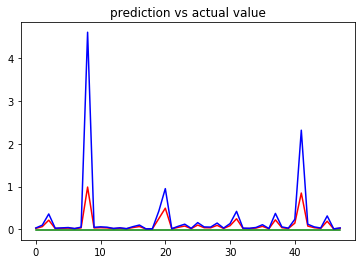

Exponential Regression Loss =  0.22437562
Prediction Loss =  0.07638705


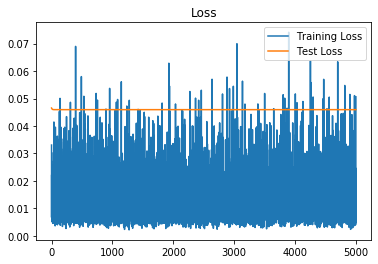

torch.Size([5000])
torch.Size([5000])


In [8]:
#compare to exponential regression
a = x.view((48,1))
b = y.view((48,512))
c = prediction.view((48,1))
plt.figure()
plt.plot(a.data.cpu().numpy(), "r", label="actual")
plt.title("prediction vs actual value")
plt.plot(c.data.cpu().numpy(), "g", label="prediction")
expPred = -np.log(b.data.cpu().numpy())
newExpPred = expPred[...,256]
plt.plot(newExpPred, 'b', label="exp")
plt.show()
newLoss = np.sqrt((a[1].cpu().numpy()-newExpPred)**2).mean()
oldLoss = np.sqrt((a[1].cpu().numpy()-c.detach().cpu().numpy())**2).mean()
print("Exponential Regression Loss = ", newLoss)
print("Prediction Loss = ", oldLoss)
# print(expPred)
# print(prediction)
testResults = plt.figure()
plt.title("Loss")
plt.plot(totalTrainLoss.detach().cpu().numpy(), label="Training Loss")
plt.plot(totalTestLoss.detach().cpu().numpy(), label="Test Loss")
plt.legend()
plt.show()

print(totalTrainLoss.shape)
print(totalTestLoss.shape)

writer.add_figure("Test Results", testResults)


# plt.figure()
# plt.plot(predictedMean.detach())
# plt.plot(tauredMean.detach())
# plt.show()


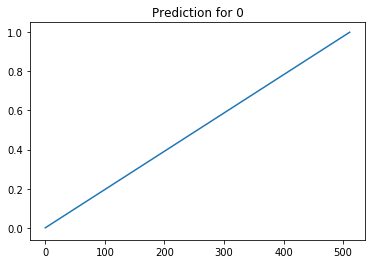

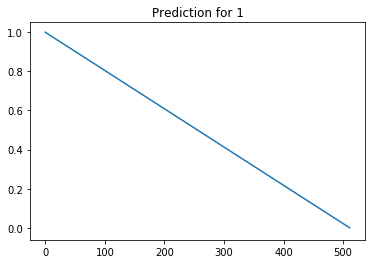

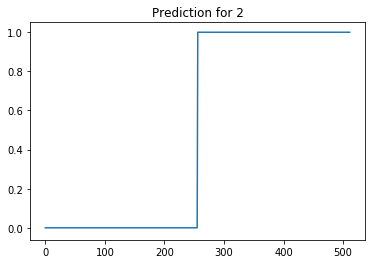

prediction1 equals prediction2:  True
prediction2 equals prediction3:  True
prediction3 equals prediction1:  True
prediction1 - prediction2
tensor([[0.]])
tensor(0.)


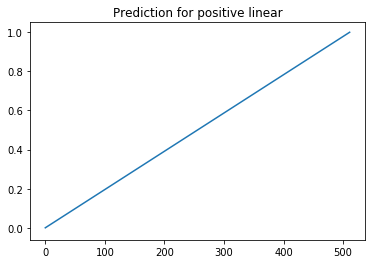

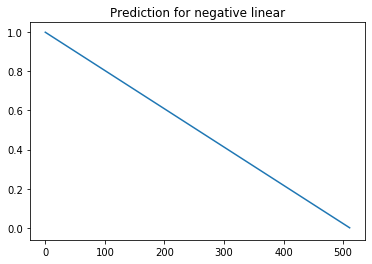

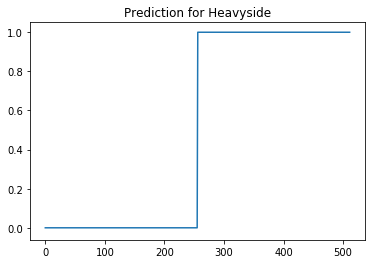

prediction1 equals prediction2:  True
prediction2 equals prediction3:  True
prediction3 equals prediction1:  True
prediction1 - prediction2
tensor([0.])
tensor(0.)


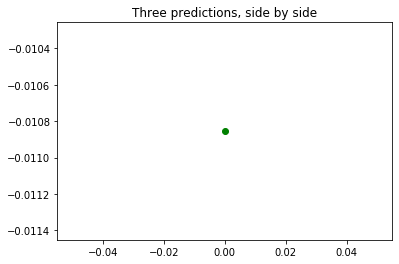

In [9]:
plotY = torch.linspace(0,1,512)
LinearY = torch.reshape(plotY, (-1,1,512))
NegLinearY = 1-1*LinearY
negplotY = 1-1*plotY
heavySidePlot = torch.cat((torch.zeros(256), torch.ones(256)))
HeavySide = torch.reshape(heavySidePlot, (-1,1,512))
net.eval()
with torch.no_grad():
    plots = torch.zeros((3,1,512))
    plots[0,0] = plotY
    plots[1,0] = negplotY
    plots[2,0] = heavySidePlot
    inputs = torch.zeros((3,1,512))
    inputs[0] = LinearY
    inputs[1] = NegLinearY
    inputs[2] = HeavySide
    predictions = net(inputs)
    for j in range(3):
        plot = plots[j]
        forecast = predictions[j]
        plot = plot.reshape(-1)
        forecast = forecast.reshape(-1)
        plt.figure()
        plt.title("Prediction for %d" %j)
        plt.plot(plot.detach().cpu().numpy())
        plt.plot(forecast.detach().cpu().numpy())
        plt.show()
    print("prediction1 equals prediction2: ", torch.equal(prediction[1], prediction[2]))
    print("prediction2 equals prediction3: ", torch.equal(prediction[2], prediction[3]))
    print("prediction3 equals prediction1: ", torch.equal(prediction[3], prediction[1]))
    print("prediction1 - prediction2")
    print(prediction[1]-prediction[2])
    print((((prediction[1]-prediction[2])**2)**.5).mean())

    prediction1 = net(LinearY)
    prediction1 = prediction1.reshape(-1)
    plt.figure()
    plt.title("Prediction for positive linear")
    plt.plot(plotY.detach().cpu().numpy())
    plt.plot(prediction1.detach().cpu().numpy())
    plt.show()

    prediction2 = net(NegLinearY)
    prediction2 = prediction2.reshape(-1)
    plt.figure()
    plt.title("Prediction for negative linear")
    plt.plot(negplotY.detach().cpu().numpy())
    plt.plot(prediction2.detach().cpu().numpy())
    plt.show()

    prediction3 = net(HeavySide)
    prediction3 = prediction3.reshape(-1)
    plt.figure()
    plt.title("Prediction for Heavyside")
    plt.plot(heavySidePlot.detach().cpu().numpy())
    plt.plot(prediction3.detach().cpu().numpy())
    plt.show()
    # print('Test Accuracy of the model on the test data: {} %'.format(100 * correct / total))
net.train()

print("prediction1 equals prediction2: ", torch.equal(prediction1, prediction2))
print("prediction2 equals prediction3: ", torch.equal(prediction2, prediction3))
print("prediction3 equals prediction1: ", torch.equal(prediction3, prediction1))
print("prediction1 - prediction2")
print(prediction1-prediction2)
print((((prediction1-prediction2)**2)**0.5).mean())

plt.figure()
plt.title("Three predictions, side by side")
plt.plot(prediction1.detach().cpu().numpy(), "r.")
plt.plot(prediction2.detach().cpu().numpy(), "go")
plt.plot(prediction3.detach().cpu().numpy(), "b--")